In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set()
plt.rcParams['figure.figsize'] = (14,8)

In [37]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\AviML\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


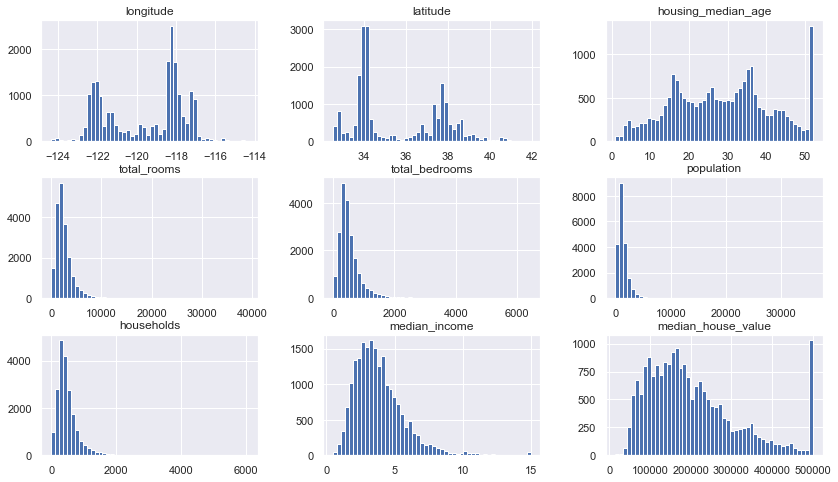

In [43]:
df.hist(bins=50)
plt.show()

<AxesSubplot:>

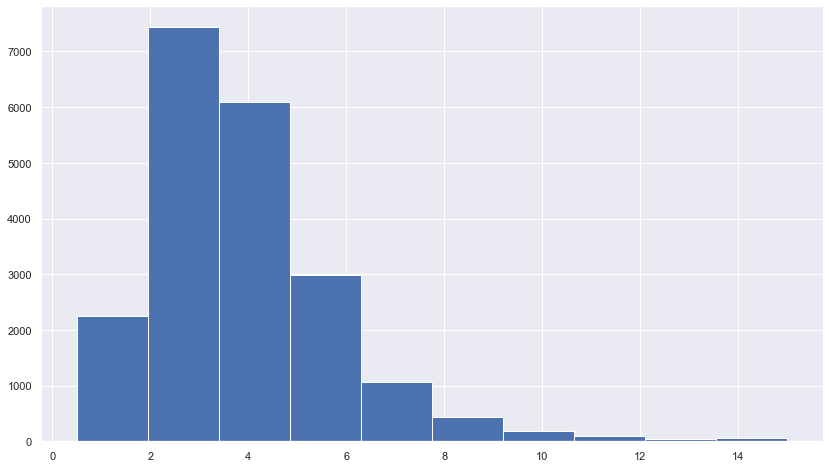

In [44]:
df['median_income'].hist()

In [46]:
df["income_cat"] = pd.cut(df['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [47]:
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

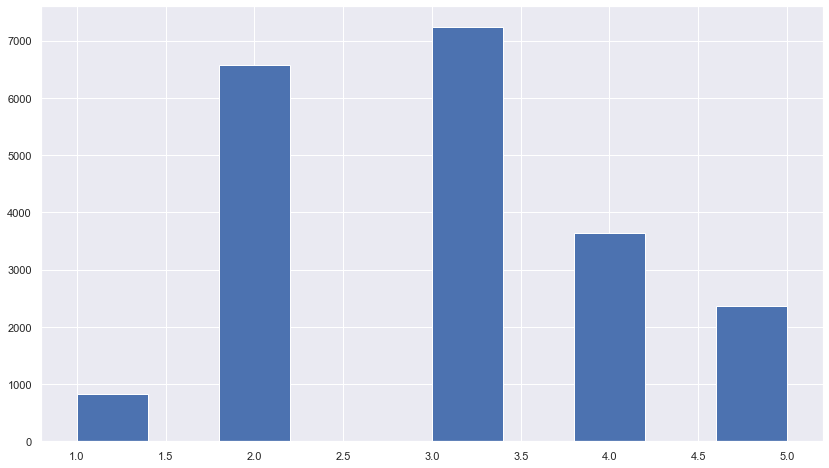

In [48]:
df['income_cat'].hist()

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [50]:
help(StratifiedShuffleSplit)

Help on class StratifiedShuffleSplit in module sklearn.model_selection._split:

class StratifiedShuffleSplit(BaseShuffleSplit)
 |  StratifiedShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
 |  
 |  Stratified ShuffleSplit cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a merge of StratifiedKFold and
 |  ShuffleSplit, which returns stratified randomized folds. The folds
 |  are made by preserving the percentage of samples for each class.
 |  
 |  Note: like the ShuffleSplit strategy, stratified random splits
 |  do not guarantee that all folds will be different, although this is
 |  still very likely for sizeable datasets.
 |  
 |  Read more in the :ref:`User Guide <stratified_shuffle_split>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=10
 |      Number of re-shuffling & splitting iterations.
 |  
 |  test_size : float or int, default=None
 |      If float

In [51]:
len(strat_train_set)

16512

In [52]:
len(strat_test_set)

4128

In [53]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({"Overall":income_cat_proportions(df),
                             "Stratified":income_cat_proportions(strat_test_set),
                             "Random":income_cat_proportions(test_set)}).sort_index()
compare_props["Rand .%error"] = 100 * compare_props['Random']/compare_props['Overall'] - 100
compare_props["Strat .%error"] = 100 * compare_props['Stratified']/compare_props['Overall'] -100
compare_props

,Overall,Stratified,Random,Rand .%error,Strat .%error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [56]:
for set in (strat_train_set,strat_test_set):
    set.drop("income_cat",axis=1,inplace=True)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

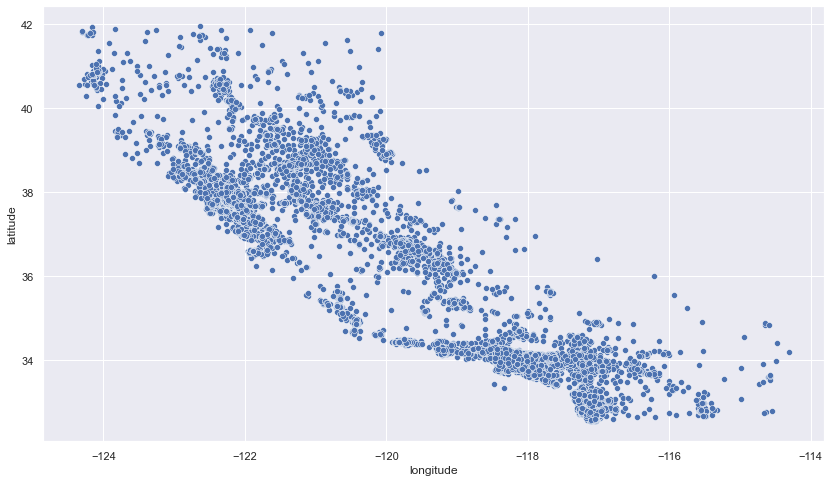

In [57]:
training_set = strat_train_set.copy()
sns.scatterplot(training_set['longitude'],training_set['latitude'])

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

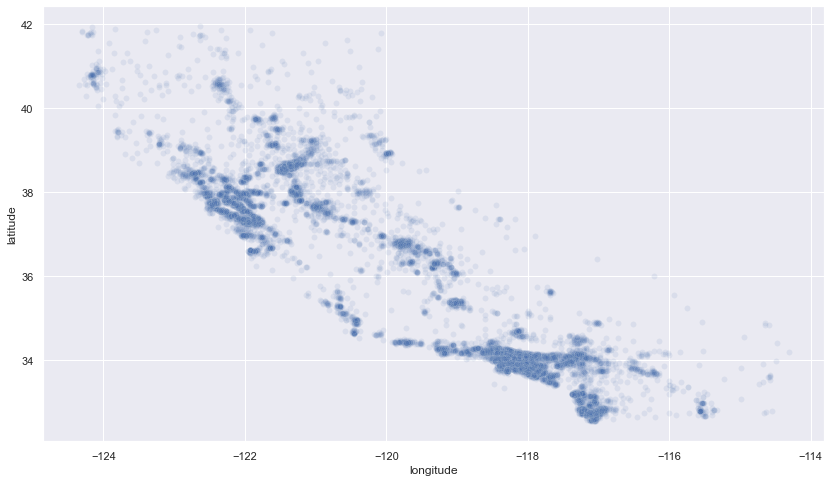

In [58]:
sns.scatterplot(training_set['longitude'],training_set['latitude'],alpha=0.1)

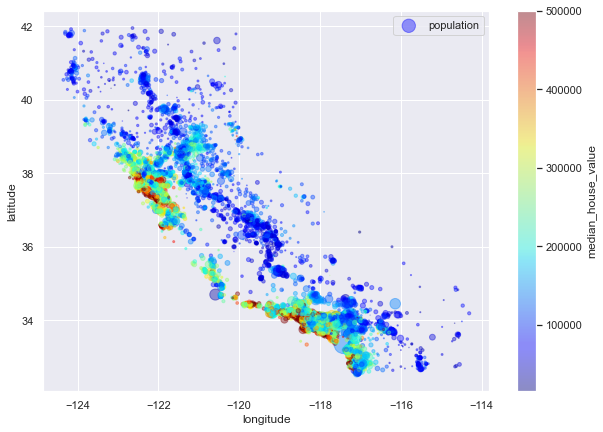

In [59]:
training_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=training_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [60]:
import matplotlib.image as mpimg
california_img = mpimg.imread(r"C:\Users\Dell\Desktop\AviML\california.png")
ax =  training_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=training_set["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False,
    sharex=False)
plt.imshow(california_img,extent=[-124.55, -113.80, 32.45, 42.05],alpha=0.5,cmap=plt.get_cmap('jet'))
plt.ylabel('Latitude',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
prices = training_set['median_house_value']
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%round(v/1000) for v in tick_values],fontsize=14)
cbar.set_label('Median House Value',fontsize=16)
plt.legend(fontsize=16)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dell\\Desktop\\AviML\\california.png'